### Predicting whether a sequence of heads or tails of length 20 was computer generated or human written
#### Neural Network with added data points:
##### Thought about adding data after the nn so now I'm trying it again, I think it will have better results

In [1]:
import util
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

In [2]:
# Same data stuff as logistic regression (cuz all im doin is adding layers)
X_train, y_train, X_test, y_test = util.load_logistic_regression_data()
X_train

array([[ 8,  1,  2, ...,  0,  0,  0],
       [11,  3,  1, ...,  0,  0,  0],
       [ 7,  5,  1, ...,  0,  0,  0],
       ...,
       [ 7,  3,  0, ...,  0,  0,  0],
       [ 8,  3,  0, ...,  0,  0,  0],
       [18,  1,  0, ...,  0,  0,  0]])

In [3]:
model = Sequential()
model.add(Dense(10, input_dim=20, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(10, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-01-16 10:38:26.325158: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-16 10:38:26.325264: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                210       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [5]:
nn_2 = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=30, batch_size=32)

Epoch 1/30


2023-01-16 10:38:26.505608: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/38 [..............................] - ETA: 19s - loss: 0.7041 - accuracy: 0.4062

2023-01-16 10:38:26.844575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 1s 14ms/step - loss: 0.6372 - accuracy: 0.5589 - val_loss: 0.5696 - val_accuracy: 0.6593
Epoch 2/30
 7/38 [====>.........................] - ETA: 0s - loss: 0.5655 - accuracy: 0.7054

2023-01-16 10:38:27.425565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 0s 10ms/step - loss: 0.5487 - accuracy: 0.7057 - val_loss: 0.4917 - val_accuracy: 0.7852
Epoch 3/30
38/38 [==============================] - 0s 12ms/step - loss: 0.5190 - accuracy: 0.7205 - val_loss: 0.4655 - val_accuracy: 0.7778
Epoch 4/30
38/38 [==============================] - 0s 9ms/step - loss: 0.4961 - accuracy: 0.7395 - val_loss: 0.4500 - val_accuracy: 0.7778
Epoch 5/30
38/38 [==============================] - 0s 11ms/step - loss: 0.4726 - accuracy: 0.7832 - val_loss: 0.4365 - val_accuracy: 0.8222
Epoch 6/30
38/38 [==============================] - 0s 9ms/step - loss: 0.4657 - accuracy: 0.7782 - val_loss: 0.4298 - val_accuracy: 0.8222
Epoch 7/30
38/38 [==============================] - 0s 8ms/step - loss: 0.4665 - accuracy: 0.7873 - val_loss: 0.4225 - val_accuracy: 0.8222
Epoch 8/30
38/38 [==============================] - 0s 8ms/step - loss: 0.4646 - accuracy: 0.7857 - val_loss: 0.4190 - val_accuracy: 0.8296
Epoch 9/30
38/38 [==========

In [6]:
y_pred = model.predict(X_test)

#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(round(y_pred[i][0]))
pred = np.array(pred)

pred

5/5 [==============================] - 0s 4ms/step


2023-01-16 10:38:36.634931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0])

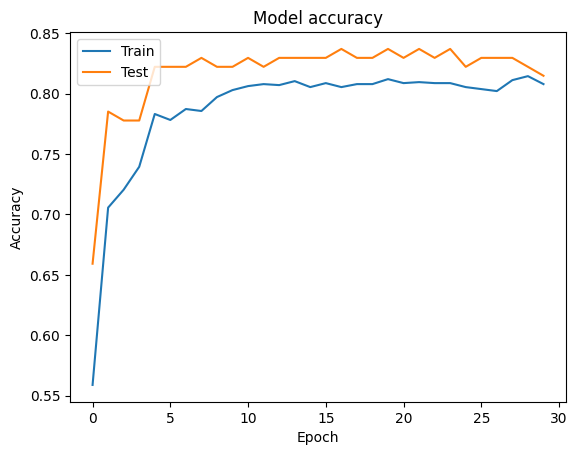

In [7]:
plt.plot(nn_2.history['accuracy'])
plt.plot(nn_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


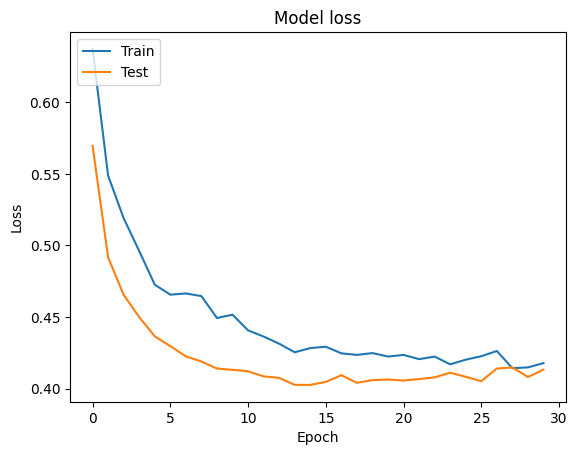

In [8]:
plt.plot(nn_2.history['loss']) 
plt.plot(nn_2.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Accuracy is: 81.48148148148148
Precision: 0.95
Recall: 0.63
F-Score: 0.76


Text(50.722222222222214, 0.5, 'True')

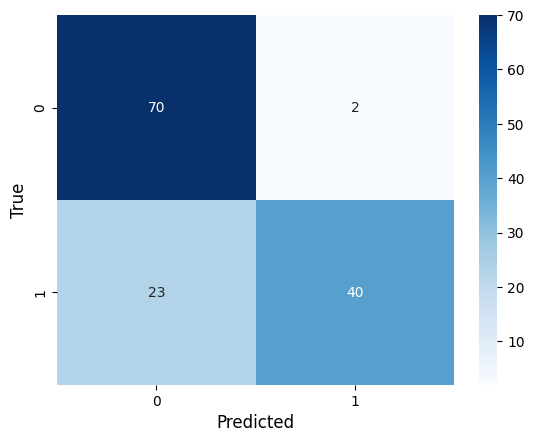

In [9]:
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, pred, average='binary')
a = accuracy_score(pred,y_test)
print('Accuracy is:', a*100)
print("Precision:", np.round(precision, 2))
print("Recall:", np.round(recall, 2))
print("F-Score:", np.round(fscore, 2))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [10]:
util.predict_nn_2(util.random_coinflip(),model)
util.predict_nn_2("hthththththththththt",model)

1/1 [==============================] - 0s 56ms/step
Model prediction of ttthhttttthhttththth: 0.784117% Computer
1/1 [==============================] - 0s 22ms/step
Model prediction of hthththththththththt: 0.999375% Human


In [11]:
model.save("./models/nn_2")

INFO:tensorflow:Assets written to: ./models/nn_2/assets
